### Linear Regression - Opening the Black Box

This notebook will focus on the implementation of Univariate Linear Regression. For better motivation and understanding, I won't be using scikit-learn (Python's main ML package). This implementation will do what scikit-learn can do in 2 lines of code - but you'll learn more.

<b>Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
sns.set()

### Part 1 - Create Dummy Data 
    
First we'll create some dummy $X$ and $y$ data. $X$ will be the feature we are using to predict $y$. As we only have one feature, which we'll sometimes refer to as $X_1$, this is univariate (one variable) regression.

In [34]:
X = 2 * np.random.rand(100,) # create 100 random numbers between 0 and 2. 100, will return a vector of numbers. Assign them to X
y = 4 + 3 * X + np.random.randn(100,) # create 100 y values that increase linearly and follow a normal distribution. Assign them to y
m = y.size

In [3]:
# create 10000 random normally distributed numbers
y_normal_10000 = np.random.randn(10000,)

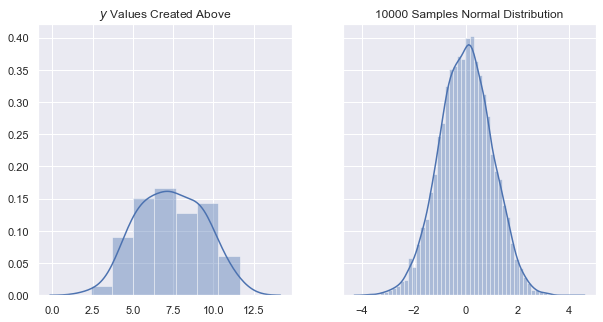

In [35]:
# Plot the y values created above, alongside a larger sample of normally distributed numbers with a more defined curve
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.distplot(y, ax=ax1)
sns.distplot(y_normal_10000, ax=ax2)
ax1.set_title('$y$ Values Created Above')
ax2.set_title('10000 Samples Normal Distribution');

In [5]:
# check the shape of our Feature Vector X and Target Vector y
y.shape, X.shape

((100,), (100,))

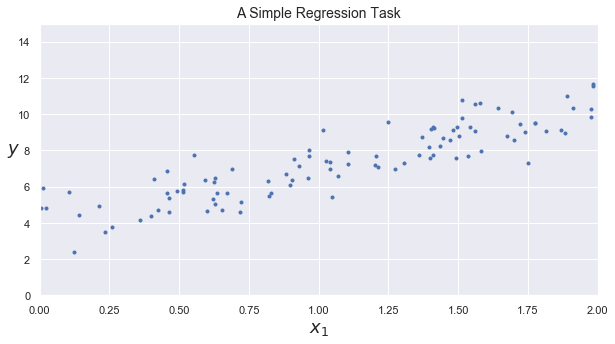

In [36]:
# Plot our X and y data
plt.figure(figsize=(10,5))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("A Simple Regression Task", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

Our objective is to fit a line through this data so that we can predict $y$ from $X_1$. 

<b> Review of Part 1 </b>

1. We created our feature vector `X` and our target vector `y`
2. We visualized the distribution of the `y` values, and a typical normal distribution for context
3. We visualized the `X` and `y` data we created

### Part 2 - The Linear Regression Equation

Not too complicated, but I'll explain the different parts of the equation and how I make sense of them.

<font size="4">$$ \hat y = \theta_0 + \theta_1 X_1 $$ </font>

$ \hat y $ - What we are trying to predict, the hat symbolizes that it's a prediction of $y$, not the actual $y$ values as created above. <br>
$ \theta_0 $ - Theta 0, this can be referred to as the intercept term. It's the value of $y$ when $X$ is 0. It's where the regression line will intercept $y$ at $X$ 0.<br>
$ \theta_1 $ - Theta 1, this is the slope of the line, which will become easier to explain later.<br>
$ X_1 $ - The feature we are using to predict $y$, the 1 denotes that it's the first feature. In our example we only use one, but in reality you'll be using more features to predict 1.<br>

So, in order to predict the value of $y$, which is $ \hat y $, we take our value for $ \theta_0 $, and then add $ \theta_1 $ (the slope) * $ X_1 $ (our X value)

In order to make good predictions, we need to find the optimum values for $ \theta_0 $ and $ \theta_1 $, that is to say, where do we fit the line through the above data to give the best fit?

### Part 3 - The Cost Function

The Cost Function, or Loss Function is a method for calculating the loss of a model. In the case of Linear Regression, we can use Mean Squared Error to measure the difference between the predicted values $ \hat y $ and the actual vales $y$.

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

Our goal is to minimise $J(\theta)$, which really means fit the line through the data with the smallest cost. The  above equation means to sum up the difference between each X value and the y prediction and then square it. You square it to turn any minus numbers into postive. You then take the average of all the differences between each X value and the y prediction to get the Mean Squared Error. This is done by the multiplying your sum of squares by $\frac{1}{2m}$, with m referring to the number of training examples.

$ h_\theta(x) $ is shorthand for the Linear Regression equation defined above.

You can do this by plotting random lines through your data, working out the cost for each line and finding the theta parameters (intercept and slope) that give the smallest Mean Squared Error - but there is a better way.

For ease of computing, we add a 1 to each instance of X. It's worth reading up on Dot Products (matrix multiplcation) in Linear Algebra as to why this is important. In short, we have two $\theta$ values so we need to have the same dimensions to multiply them by, which is why we add a 1 column to our single X values.

In [37]:
X = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [38]:
# show the first 4 rows of the matrix with the 1 added in
X[:4] 

array([[1.        , 0.35970158],
       [1.        , 1.20603598],
       [1.        , 1.75007483],
       [1.        , 0.42377063]])

In [39]:
# create dummy theta values, the intercept is 0 and the slope is 2
dummy_theta = np.array([0, 2])

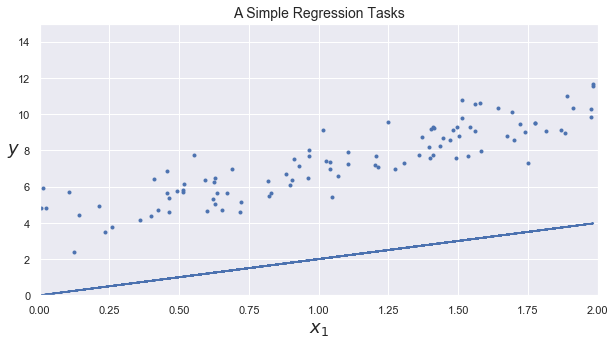

In [40]:
plt.figure(figsize=(10,5))
plt.plot(X[:, 1], y, "b.")
plt.plot(X[:, 1], np.dot(X, dummy_theta), '-')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("A Simple Regression Tasks", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

As you can see, we've plotted a Regression line to the data. The intercept is 0, and the slope is 2 (passes x 1 at y 2). It's not a very good prediction, and doesn't fit the data well, which will result in a large cost function.

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$

In [41]:
def computeCost(X, y, theta): # this function is computing the Mean Squared Error equation above
    m = y.size 
    h = np.dot(X, theta) 
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))   
    return J

`J` is taking the sum of the squared differences better our predictions (calculated by X * Theta) and the actual $y$ values. This is why we added a column of 1s to the X values, so that the $X$ array has the same column length as the Theta array (2).

In [42]:
# First Row of X - 1 and 0.35970158
X[0]

array([1.        , 0.35970158])

In [43]:
# The dot product works out 1x0 (theta 0, intercept) + 0.35970158 x 2 (theta 1, slope)
np.dot(X[0], np.array([0, 2])) # these are just dummy theta 0 and 1 values, we could use whatever for now

0.7194031685817026

J will return the sum of the squared differences between the predictions $\hat y$ and the actual $y$ values. We've done 2 runs below using different theta values. The second has a much smaller error rate, which seems logical as we've set the intercept to 4, which is where you would roughly set the regression line by eye.

In [44]:
J = computeCost(X, y, theta=np.array([0, 2]))
print('With theta = [0, 2] \nCost computed = %.2f' % J)

J = computeCost(X, y, theta=np.array([4, 4]))
print('With theta = [4, 4]\nCost computed = %.2f' % J)

With theta = [0, 2] 
Cost computed = 14.23
With theta = [4, 4]
Cost computed = 0.96


### Part 4 - Gradient Descent

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

We've added the learning rate $\alpha$ to the equation, which controls how big a step we take when updating the $\theta_j$ parameters. It's best pratise to set this quite small, because if it's too large you will overshoot the best theta parameters - this concept seems very abstract right now, but will become clearer as we go on.

I like to imagine Gradient Descent as being on top of a mountain, and you need to descend the mountain to get to the flat at the bottom. 

In [45]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = y.shape[0]  # number of training examples    
    # make a copy of theta, to avoid changing the original array
    theta = theta.copy()    
    J_history = [] # Use a python list to save cost in every iteration
    theta_history = [] # Use a python list to save thetas in every iteration
    
    for i in range(num_iters): 
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCost(X, y, theta))
        theta_history.append(theta)
        
    return theta, J_history, theta_history

In [46]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 2000
alpha = 0.001

theta, J_history, theta_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))

Theta found by gradient descent: 3.2719, 3.6697


We started with the $\theta$ values set to 0 (np.zeros), run 2000 iterations of gradient descent with a learning rate of 0.001. After every iteration, the $\theta$ will be adjusted so that the cost value decreases and moves towards a global minimum. The function above prints out the optimum values for $\theta$.

In [47]:
gradient_history = []

for i in theta_history:
    gradient = (alpha / m) * (np.dot(X, i) - y).dot(X)
    gradient_history.append(gradient)
    
gradient_history_arr = np.array(gradient_history)
J_history_arr = np.array(J_history)
theta_history_arr = np.array(theta_history)

theta0_gradients = gradient_history_arr[:, 0]
theta1_gradients = gradient_history_arr[:, 1]

theta0_history = theta_history_arr[:, 0]
theta1_history = theta_history_arr[:, 1]

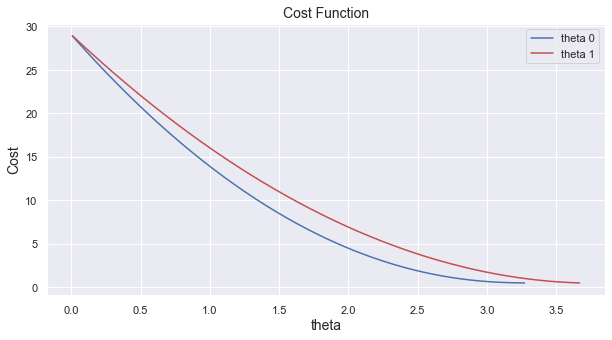

In [48]:
plt.figure(figsize=(10,5))
plt.plot(theta0_history, J_history_arr, "b-", label="theta 0")
plt.plot(theta1_history, J_history_arr, "r-", label="theta 1")
plt.xlabel("theta", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost Function", fontsize=14)
plt.legend()
plt.show()

The error rate (cost) was very high at the start of our Gradient Descent - when theta was 0,0. As Theta started to increase, the cost started to decrease until it found the lowest cost it could and the best fitting line.

We can now fit a line to our data with the optimum values for $\theta$, as you can see, this fits the data very well. I've included other lines from early Thetas so you can see how Gradient Descent converged to the best solution.

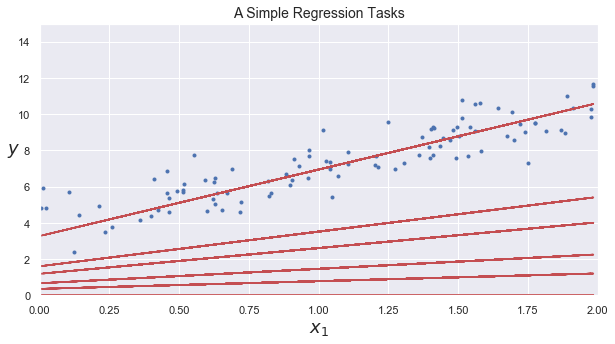

In [49]:
plt.figure(figsize=(10,5))
plt.plot(X[:, 1], y, "b.")
plt.plot(X[:, 1], np.dot(X, theta_history[0]), 'r-')
plt.plot(X[:, 1], np.dot(X, theta_history[50]), 'r-')
plt.plot(X[:, 1], np.dot(X, theta_history[100]), 'r-')
plt.plot(X[:, 1], np.dot(X, theta_history[200]), 'r-')
plt.plot(X[:, 1], np.dot(X, theta_history[300]), 'r-')
plt.plot(X[:, 1], np.dot(X, theta), 'r-')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("A Simple Regression Tasks", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### Linear Regression in Scikit-Learn

In [26]:
from sklearn.linear_model import LinearRegression

In [32]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

In [33]:
reg = LinearRegression().fit(X, y)

print(reg.coef_)
print(reg.intercept_)

[[3.06948896]]
[3.98207373]
